# Stationary solutions, Box-Jenkins Modeling, AIC and BIC

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

Consider the AR(2) equation: 
\begin{equation*}
  y_t - 0.5 y_{t-1} + 0.25 y_{t-2} = \epsilon_t
\end{equation*}
Show that it has a causal stationary solution. Write the solution explicitly in terms of $\epsilon_t$. 

The characteristic polynomial corresponding to this equation is: $\phi(z) = 1 - 0.5 z + 0.25 z^2$. Its roots are easily seen to be $2 \exp(\pm i\pi/3)$ whose modulus equals 2. Since the modulus is strictly larger than 1, this AR(2) equation admits a causal stationary solution. To express the solution explicitly in terms of $\{\epsilon_t\}$, we first write: 
\begin{equation*}
   \phi(z) = \left(1 - 0.5 \exp(i \pi/3) z \right)\left(1 - 0.5 \exp(-i \pi/3) z \right)
\end{equation*}
so that 
\begin{align*}
  y_t &= \frac{1}{\phi(B)} \epsilon_t \\ &= \left(I - 0.5 \exp(i \pi/3) B \right)^{-1}\left(I - 0.5 \exp(-i \pi/3) B \right)^{-1} \epsilon_t \\ &= \left(\sum_{j=0}^{\infty} 0.5^j \exp(i j \pi/3) B^j \right)\left(\sum_{k=0}^{\infty} 0.5^k \exp(-i k \pi/3) B^k \right) \epsilon_t \\
  &= \sum_{j=0}^{\infty} \sum_{k=0}^{\infty} 0.5^{j+k} \exp \left(\frac{i(j-k)\pi}{3} \right) \epsilon_{t - j - k}. 
\end{align*}
A simpler expression for $y_t$ can be obtained using the following.  Let $a_1 = 0.5 \exp(i \pi/3)$ and $a_2 = 0.5 \exp(-i\pi/3)$. Check that
\begin{align*}
    \frac{1}{(1 - a_1 z)(1 - a_2 z)} = \frac{a_1}{(a_1 - a_2)(1 - a_1 z)} + \frac{a_2}{(a_2 - a_1) (1 - a_2 z)} = \frac{a_1}{a_1 - a_2} \sum_{j=0}^{\infty} (a_1 z)^j + \frac{a_2}{a_2 - a_1} \sum_{j=0}^{\infty} (a_2 z)^j = \sum_{j=0}^{\infty} \psi_j z^j
\end{align*}
where
\begin{align*}
   \psi_j = \frac{a_1^{j+1} - a_2^{j+1}}{a_1 - a_2} = (0.5)^{j+1}\frac{\exp((j+1)i\pi/3) - \exp(-(j+1)i\pi/3)}{0.5\exp(i\pi/3) - 0.5\exp(-i\pi/3)} = (0.5)^{j} \frac{\sin((j+1)\pi/3)}{\sin(\pi/3)} = \frac{2}{\sqrt{3}} (0.5)^{j} \sin \left( \frac{(j+1)\pi}{3} \right). 
\end{align*}
We thus  have
\begin{align*}
   y_t = \sum_{j=0}^{\infty} \psi_j \epsilon_{t-j} = \frac{2}{\sqrt{3}} \sum_{j=0}^{\infty} (0.5)^{j} \sin\left( \frac{(j+1)\pi}{3} \right) \epsilon_{t-j} .
\end{align*}
The above expression represents the given causal stationary AR(2) process as an infinite order MA (MA($\infty$)) process. 


There is an inbuilt statsmodels function (shown  below) which gives the MA($\infty$) representation of every casual stationary ARMA process. 

In [2]:
from statsmodels.tsa.arima_process import ArmaProcess

ar = [1, -0.5, 0.25] # these are the phi-coefficients of the given AR process
ma = [1] 
# these are the theta-coefficients of the ARMA process 
# (since we are dealing with a pure AR process, there is no theta coefficient)
AR2_process = ArmaProcess(ar, ma)
nlags = 20

ma_infinity = AR2_process.arma2ma(lags=nlags) # this gives \psi_j, j = 0, \dots, lags-1

psi_j = np.array([
    (2 / np.sqrt(3)) * (0.5) ** j * np.sin((j + 1) * np.pi / 3)
    for j in range(nlags)
])

print(np.column_stack([psi_j, ma_infinity]))

[[ 1.00000000e+00  1.00000000e+00]
 [ 5.00000000e-01  5.00000000e-01]
 [ 3.53525080e-17  0.00000000e+00]
 [-1.25000000e-01 -1.25000000e-01]
 [-6.25000000e-02 -6.25000000e-02]
 [-8.83812699e-18  0.00000000e+00]
 [ 1.56250000e-02  1.56250000e-02]
 [ 7.81250000e-03  7.81250000e-03]
 [ 1.65714881e-18  0.00000000e+00]
 [-1.95312500e-03 -1.95312500e-03]
 [-9.76562500e-04 -9.76562500e-04]
 [-2.76191468e-19  0.00000000e+00]
 [ 2.44140625e-04  2.44140625e-04]
 [ 1.22070313e-04  1.22070312e-04]
 [ 1.68347800e-19  0.00000000e+00]
 [-3.05175781e-05 -3.05175781e-05]
 [-1.52587891e-05 -1.52587891e-05]
 [-6.47323754e-21  0.00000000e+00]
 [ 3.81469727e-06  3.81469727e-06]
 [ 1.90734863e-06  1.90734863e-06]]


## TTLCONS (Total Construction Spending Data)

In Lecture 22, we fit ARIMA models to the following dataset. 

  observation_date  TTLCONS
0       1993-01-01   458080
1       1993-02-01   462967
2       1993-03-01   458399
3       1993-04-01   469425
4       1993-05-01   468998
386


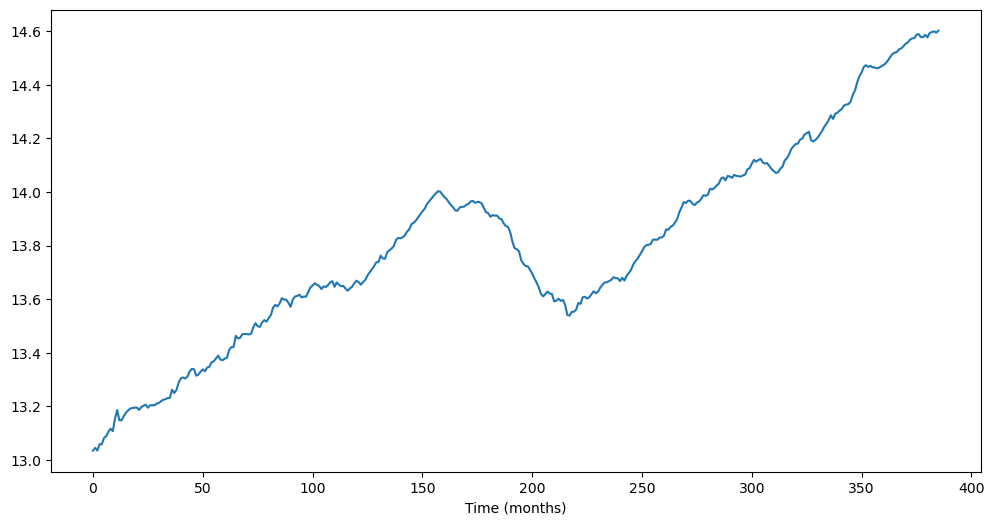

In [3]:
ttlcons = pd.read_csv('TTLCONS_14April2025.csv')
print(ttlcons.head())

y = np.log(ttlcons['TTLCONS']) # note that we are taking logarithms
print(len(y))

plt.figure(figsize = (12, 6))
plt.plot(y)
plt.xlabel('Time (months)')
plt.show()


We fitted the following models to $\{y_t\}$ (here $y_t$ is log of the data from FRED) 
1. AR(3) for $y_t - y_{t-1}$: $$y_t - y_{t-1} = \phi_0 + \phi_1 (y_{t-1} - y_{t-2}) + \phi_2 (y_{t-2} - y_{t-3}) + \phi_3 (y_{t-3} - y_{t-4}) + \epsilon_t$$
2. ARIMA(3, 1, 0) for $y_t$: $$y_t - y_{t-1} = \phi_1 (y_{t-1} - y_{t-2}) + \phi_2 (y_{t-2} - y_{t-3}) + \phi_3 (y_{t-3} - y_{t-4}) + \epsilon_t$$ (the only difference betwen this model and the previous one is the absence of the $\phi_0$ term)
3. ARIMA(0, 2, 1) for $y_t$: $$y_t - 2 y_{t-1} + y_{t-2} = \epsilon_t + \theta \epsilon_{t-1}$$
4. ARIMA(3, 2, 2) for $y_t$: $$y_{t} - 2 y_{t-1} + y_{t-2} - \phi_1 \left(y_{t-1} - 2 y_{t-2} + y_{t-3} \right) - \phi_2 \left(y_{t-2} - 2 y_{t-3} + y_{t-4} \right) - \phi_3 \left(y_{t-3} - 2 y_{t-4} + y_{t-5} \right) = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2}$$

Note that there is no intercept term in models 2, 3, and 4. 

Here is the code for fitting each of these models. 

### Model One

We will difference the data and then fit the AR(3) model. This can be done in two ways. Either we can use AutoReg or ARIMA(3, 0, 0). 

In [ ]:
mod1_AutoReg = AutoReg(np.diff(y), lags=3).fit()
print(mod1_AutoReg.summary()) 
# AutoReg uses OLS (also known as conditional MLE) for parameter estimation. 

# Alternatively, we can use ARIMA(3, 0, 0). This method uses the full MLE: 
mod1 = ARIMA(np.diff(y), order=(3, 0, 0), trend='c').fit()
print(mod1.summary())

# Both these methods give similar but slightly different answers: 
print(np.column_stack([mod1_AutoReg.params, mod1.params[:-1]])) 
# From this output, we can see that the estimate of the intercept is slightly different (almost double) 
# but the remaining estimates are almost the same. 


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  385
Model:                     AutoReg(3)   Log Likelihood                1179.667
Method:               Conditional MLE   S.D. of innovations              0.011
Date:                Fri, 18 Apr 2025   AIC                          -2349.335
Time:                        09:33:42   BIC                          -2329.608
Sample:                             3   HQIC                         -2341.509
                                  385                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.001      3.302      0.001       0.001       0.003
y.L1           0.2148      0.050      4.309      0.000       0.117       0.313
y.L2           0.0636      0.051      1.252      0.2

The main difference between the parameter estimates from the two different versions of fitting AR(3) to $y_t - y_{t-1}$ is in the intercept estimate (0.0021 vs 0.0041). But the two parameter estimates lead to almost the same predictions. In the code below, predictions are first obtained for the differenced data, and then for the original data. 

In [5]:
n = len(y)
k = 100
fcast_diff_1 = mod1_AutoReg.get_prediction(start=n-1, end=n+k-2).predicted_mean 
# these are the forecasts for the differenced data
last_observed_y = y.iloc[-1]
fcast_1 = np.zeros(k)
fcast_1[0] = last_observed_y + fcast_diff_1[0]
for i in range(1, k):
    fcast_1[i] = fcast_1[i-1] + fcast_diff_1[i]

Next we obtain the forecasts using mod1 (which was fitted using ARIMA(3, 0, 0)). 

In [6]:
n = len(y)
k = 100
fcast_diff_1_arima = mod1.get_prediction(start=n-1, end=n+k-2).predicted_mean 
# these are the forecasts for the differenced data
last_observed_y = y.iloc[-1]
fcast_1_arima = np.zeros(k)
fcast_1_arima[0] = last_observed_y + fcast_diff_1_arima[0]
for i in range(1, k):
    fcast_1_arima[i] = fcast_1_arima[i-1] + fcast_diff_1_arima[i]

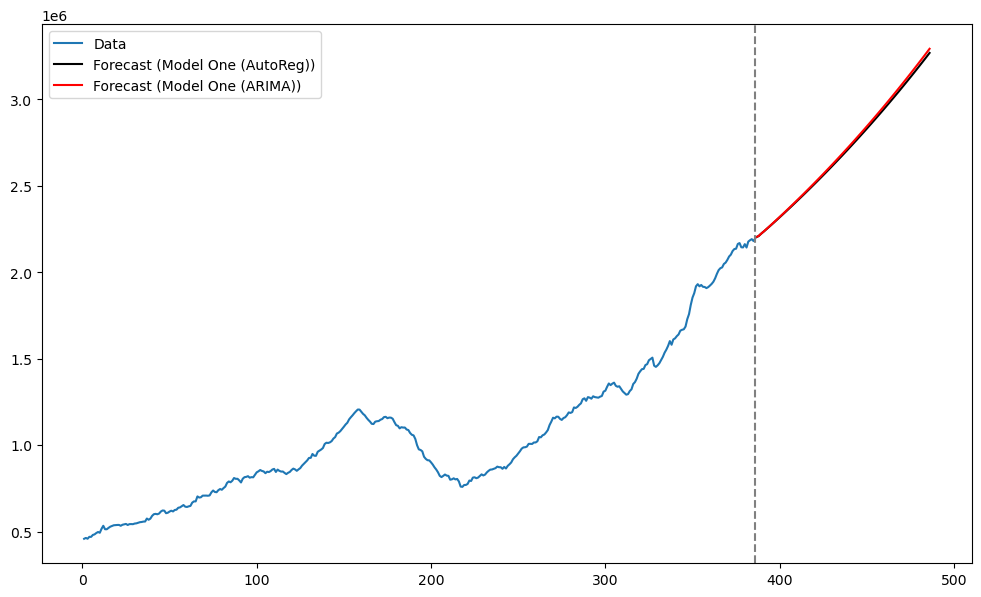

In [7]:
tme = range(1, n+1)
tme_future = range(n+1, n+k+1)


plt.figure(figsize = (12, 7))
plt.plot(tme, np.exp(y), label = 'Data')
plt.plot(tme_future, np.exp(fcast_1), label = 'Forecast (Model One (AutoReg))', color = 'black')
plt.plot(tme_future, np.exp(fcast_1_arima), label = 'Forecast (Model One (ARIMA))', color = 'red')
plt.axvline(x=n, color='gray', linestyle='--')
plt.legend()
plt.show()

One can ask if Model One can be fit directly to the original data via ARIMA(3, 1, 0). This function, by default, will not include an intercept term (i.e., it will fit Model Two). To use the intercept term for the differenced data, one needs to supply the argument 't' for trend as follows. 

In [8]:
mod1_arima = ARIMA(y, order=(3, 1, 0), trend='t').fit()
print(mod1_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                TTLCONS   No. Observations:                  386
Model:                 ARIMA(3, 1, 0)   Log Likelihood                1187.247
Date:                Fri, 18 Apr 2025   AIC                          -2364.495
Time:                        09:33:42   BIC                          -2344.729
Sample:                             0   HQIC                         -2356.656
                                - 386                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0041      0.001      3.693      0.000       0.002       0.006
ar.L1          0.2148      0.046      4.717      0.000       0.126       0.304
ar.L2          0.0636      0.045      1.425      0.1

The output above is basically the same as the output for mod1 (ARIMA(3, 0, 0) applied to diff(y)). With this models, predictions are obtained directly for the original data and there is no need for post-processing to convert them into predictions for the original series. 

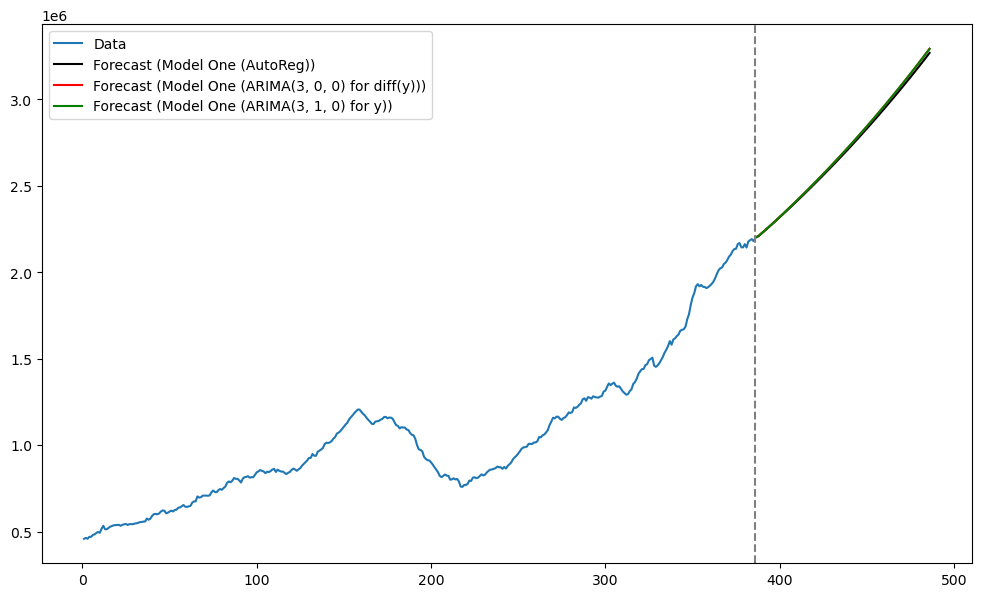

In [9]:
fcast_y_arima = mod1_arima.get_prediction(start=n, end=n+k-1).predicted_mean 

plt.figure(figsize = (12, 7))
plt.plot(tme, np.exp(y), label = 'Data')
plt.plot(tme_future, np.exp(fcast_1), label = 'Forecast (Model One (AutoReg))', color = 'black')
plt.plot(tme_future, np.exp(fcast_1_arima), label = 'Forecast (Model One (ARIMA(3, 0, 0) for diff(y)))', color = 'red')
plt.plot(tme_future, np.exp(fcast_y_arima), label = 'Forecast (Model One (ARIMA(3, 1, 0) for y))', color = 'green')
plt.axvline(x=n, color='gray', linestyle='--')
plt.legend()
plt.show()

The predictions are basically the same for the three versions of fitting Model One. 

### Model Two

Next we move to Model Two which we fit by applying ARIMA(3, 1, 0) directly to $y_t$ (there is no need to provide any special argument as in trend = ''). 

In [10]:
mod2 = ARIMA(y, order=(3, 1, 0)).fit()
print(mod2.summary())


                               SARIMAX Results                                
Dep. Variable:                TTLCONS   No. Observations:                  386
Model:                 ARIMA(3, 1, 0)   Log Likelihood                1181.467
Date:                Fri, 18 Apr 2025   AIC                          -2354.934
Time:                        09:33:42   BIC                          -2339.121
Sample:                             0   HQIC                         -2348.662
                                - 386                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2497      0.047      5.316      0.000       0.158       0.342
ar.L2          0.0941      0.042      2.216      0.027       0.011       0.177
ar.L3          0.2363      0.046      5.127      0.0

This model does not fit a constant term, as can be seen from the regression output above. This lack of constant term affects predictions quite strongly, as seen below. 

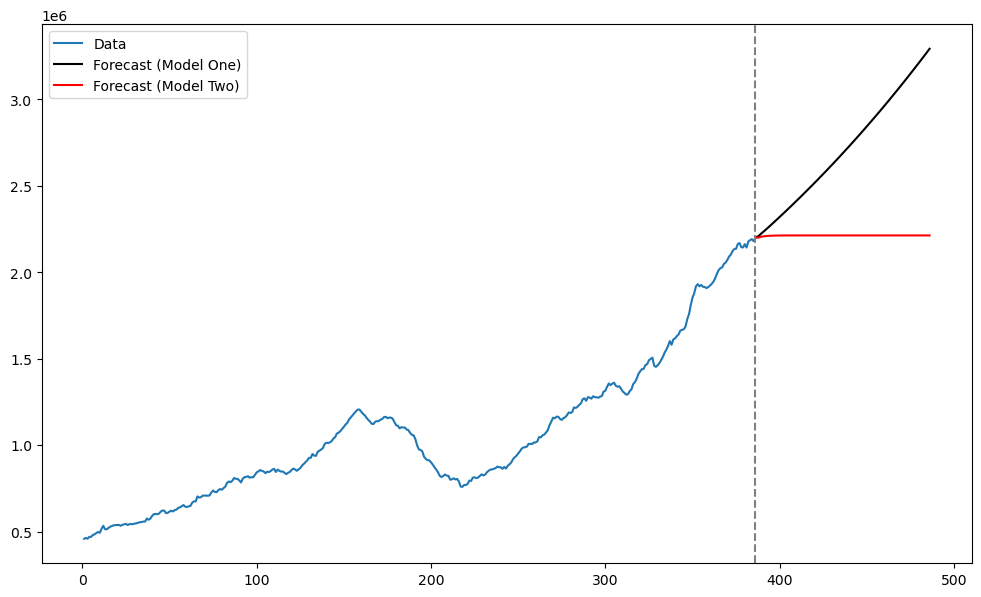

In [11]:
fcast_2 = mod2.get_prediction(start=n, end=n+k-1).predicted_mean

plt.figure(figsize = (12, 7))
plt.plot(tme, np.exp(y), label = 'Data')
plt.plot(tme_future, np.exp(fcast_y_arima), label = 'Forecast (Model One)', color = 'black')
plt.plot(tme_future, np.exp(fcast_2), label = 'Forecast (Model Two)', color = 'red')
plt.axvline(x=n, color='gray', linestyle='--')
plt.legend()
plt.show()

The lack of the intercept term provides bad predictions. 

### Model Three

Next we fit Model Three ARIMA(0, 2, 1) to $y$. 

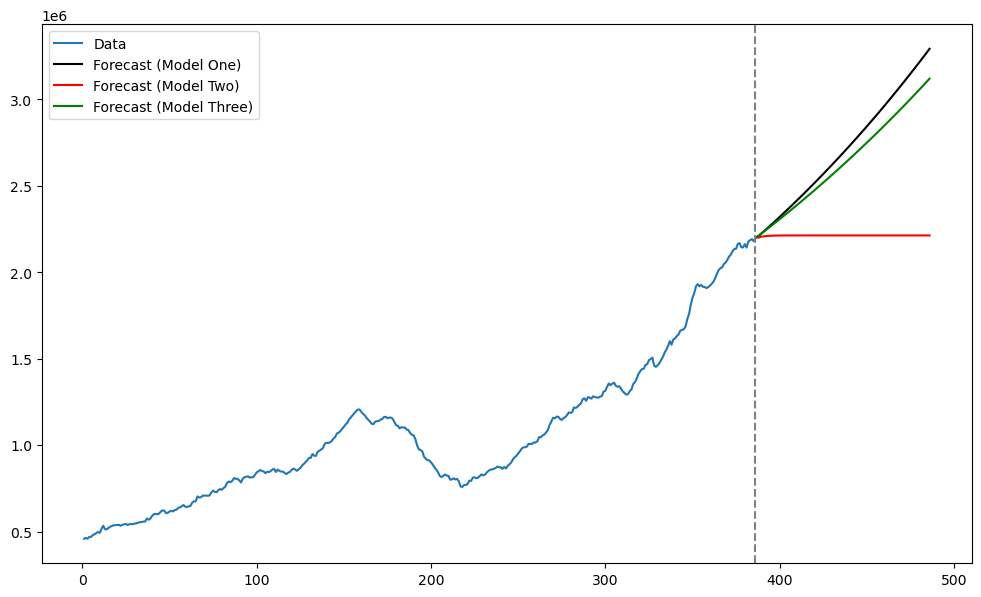

In [12]:
mod3 = ARIMA(y, order=(0, 2, 1)).fit()
fcast_3 = mod3.get_prediction(start=n, end=n+k-1).predicted_mean

plt.figure(figsize = (12, 7))
plt.plot(tme, np.exp(y), label = 'Data')
plt.plot(tme_future, np.exp(fcast_y_arima), label = 'Forecast (Model One)', color = 'black')
plt.plot(tme_future, np.exp(fcast_2), label = 'Forecast (Model Two)', color = 'red')
plt.plot(tme_future, np.exp(fcast_3), label = 'Forecast (Model Three)', color = 'green')
plt.axvline(x=n, color='gray', linestyle='--')
plt.legend()
plt.show()

Models one and three give somewhat similar predictions. 

### Model Four

We fit Model Four by using ARIMA(3, 2, 2) on $y$. 

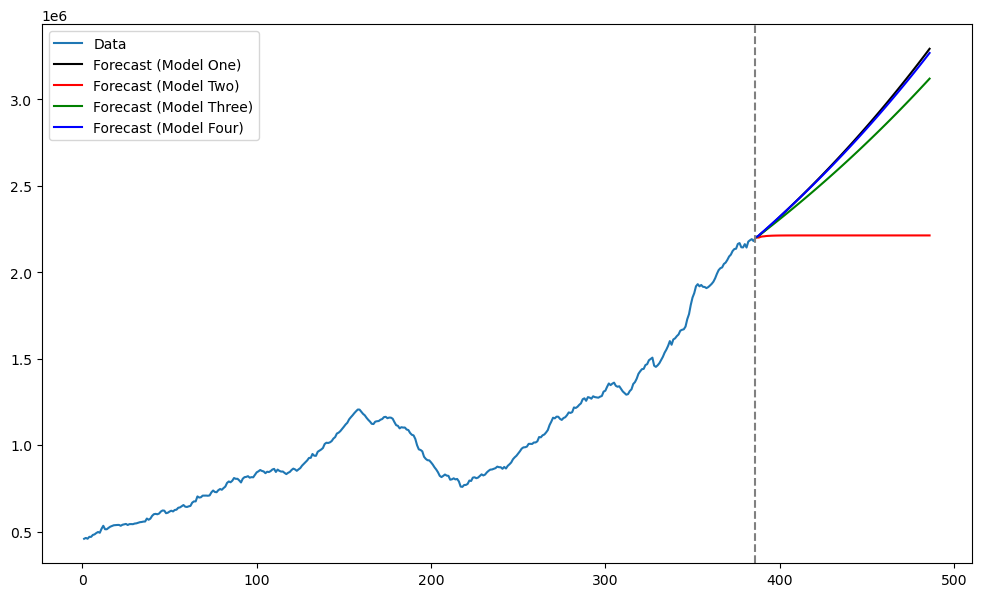

In [13]:
mod4 = ARIMA(y, order=(3, 2, 2)).fit()
fcast_4 = mod4.get_prediction(start=n, end=n+k-1).predicted_mean

plt.figure(figsize = (12, 7))
plt.plot(tme, np.exp(y), label = 'Data')
plt.plot(tme_future, np.exp(fcast_y_arima), label = 'Forecast (Model One)', color = 'black')
plt.plot(tme_future, np.exp(fcast_2), label = 'Forecast (Model Two)', color = 'red')
plt.plot(tme_future, np.exp(fcast_3), label = 'Forecast (Model Three)', color = 'green')
plt.plot(tme_future, np.exp(fcast_4), label = 'Forecast (Model Four)', color = 'blue')
plt.axvline(x=n, color='gray', linestyle='--')
plt.legend()
plt.show()

### Comparison between Model One and Model Four: 

Models 1 and 4 give essentially the same forecast. They appear quite different: Model 1 is AR(3) with intercept applied to diff(y) while Model 4 is ARMA(3, 2) applied to diff(diff(y)) (twice differenced data) without intercept. Why are they giving the same forecast?

In [14]:
print(mod4.summary())

                               SARIMAX Results                                
Dep. Variable:                TTLCONS   No. Observations:                  386
Model:                 ARIMA(3, 2, 2)   Log Likelihood                1184.165
Date:                Fri, 18 Apr 2025   AIC                          -2356.331
Time:                        09:33:43   BIC                          -2332.627
Sample:                             0   HQIC                         -2346.929
                                - 386                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0428      0.592      0.072      0.942      -1.117       1.203
ar.L2         -0.0126      0.071     -0.177      0.860      -0.152       0.127
ar.L3          0.1041      0.062      1.691      0.0

## AIC and BIC

In lectures this week, we used AIC and BIC to do model selection. The formulae for AIC and BIC are: 
\begin{equation*}
   AIC \text{ for model} = (-2) \times \text{maximized log-likelihood for model} + 2 \times \text{number of parameters in the model}
\end{equation*}
and 
\begin{equation*}
     BIC \text{ for model} = (-2) \times \text{maximized log-likelihood for model} + (\log \text{~sample size}) \times \text{number of parameters in the model}
\end{equation*}


Let us compute these for each of the models and check if the answer matches the one given by the model function.  


In [15]:
n = len(y)
mod1_aic_formula = -2 * mod1_arima.llf + 2 * len(mod1_arima.params)
mod1_bic_formula = -2 * mod1_arima.llf + (np.log(n - 1)) * len(mod1_arima.params)
print(mod1_aic_formula, mod1_arima.aic)
print(mod1_bic_formula, mod1_arima.bic)
# Note that we have used (n - 1) for sample size in the calculation for BIC 
# because this model is really applied to the differenced data and there are n - 1 first differences

-2364.494873895399 -2364.494873895399
-2344.72865722396 -2344.72865722396


In [16]:
n = len(y)
mod2_aic_formula = -2 * mod2.llf + 2 * len(mod2.params)
mod2_bic_formula = -2 * mod2.llf + (np.log(n - 1)) * len(mod2.params)
print(mod2_aic_formula, mod2.aic)
print(mod2_bic_formula, mod2.bic)


-2354.933614650533 -2354.933614650533
-2339.120641313382 -2339.120641313382


In [17]:
n = len(y)
mod3_aic_formula = -2 * mod3.llf + 2 * len(mod3.params)
mod3_bic_formula = -2 * mod3.llf + (np.log(n - 2)) * len(mod3.params)
print(mod3_aic_formula, mod3.aic)
print(mod3_bic_formula, mod3.bic)
# Now we are using (n - 2) for sample size in the calculation of BIC 
# because this model is applied to the twice-differenced data and there are n - 2 second order differences. 


-2357.3214233532403 -2357.3214233532403
-2349.420138248065 -2349.420138248065


In [18]:
n = len(y)
mod4_aic_formula = -2 * mod4.llf + 2 * len(mod4.params)
mod4_bic_formula = -2 * mod4.llf + (np.log(n - 2)) * len(mod4.params)
print(mod4_aic_formula, mod4.aic)
print(mod4_bic_formula, mod4.bic)
# Again we are using (n - 2) for sample size in the calculation of BIC 
# because this model is applied to the twice-differenced data and there are n - 2 second order differences. 


-2356.33062605351 -2356.33062605351
-2332.626770737984 -2332.626770737984
